# Project number 1

#### Bjørn-Jostein Singstad

## Abstract

Abstract: accurate and informative? Total number of possible points: 5*

The main aim of this project is to study in more detail various regression methods, including the Ordinary Least Squares (OLS) method, Ridge regression and finally Lasso regression. The methods are in turn combined with resampling techniques[1]  \cite{granger2013}




\begin{align}
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

$jdjjdjdj \cite{granger2013} $

<cite data-cite="hshsh"></cite>


test citation
<cite data-cite="hshsh"></cite>

## Introduction

Introduction: status of problem and the major objectives. Total number of possible points: 10

We will first study how to fit polynomials to a specific two-dimensional function called Franke's function. This is a function which has been widely used when testing various interpolation and fitting algorithms. Furthermore, after having etsablished the model and the method, we will employ resamling techniques such as the cross-validation and the bootstrap methods, in order to perform a proper assessment of our models [1].

In this case we will have two predictors and need to fit a function (for example a polynomial) of x and y. Thereafter we will repeat much of the same procedure using the the Ridge and Lasso regression methods, introducing thus a dependence on the bias (penalty) λ. [1]

## Formalism/methods

Test:
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

f(x,y)=34exp(−(9x−2)24−(9y−2)24)+34exp(−(9x+1)249−(9y+1)10)+12exp(−(9x−7)24−(9y−3)24)−15exp(−(9x−4)2−(9y−7)2)

$$ 2+3

$$ MSE(y^,y~^)=1n∑i=0n−1(yi−y~i)2)

$ R2(y^,y^~)=1−∑n−1i=0(yi−y~i)2∑n−1i=0(yi−y¯)2,

y¯=1n∑i=0n−1yi

%% $$ 64

Discussion of the methods used and their basis/suitability. Total number of possible points 20

## Code/Implementations/test

Code/Implementations/test: Readability of code, implementation, testing and discussion of benchmarks. Total number of possible points 20

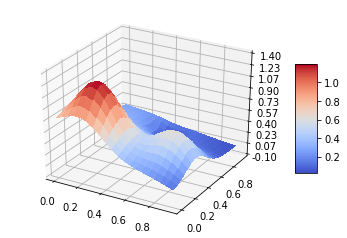

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Forsøker her å prediktere y med hensyn på x og z

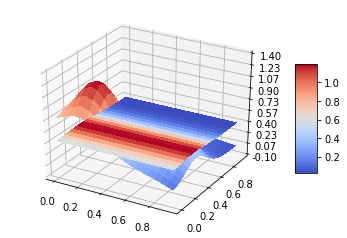

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
#from sklearn.pipeline import make_pipeline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)



def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#def PolynomialRegression(degree=2, **kwargs):
 #   return make_pipeline(PolynomialFeatures(degree),
  #                       LinearRegression(**kwargs))


#model = PolynomialRegression(2)
ols = LinearRegression()

model=ols.fit(x,y)

#X_test=np.linspace(0,1,100)[:, None]

z = FrankeFunction(x, y)


z_test = model.predict(z)


# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

bla = ax.plot_surface(x, y, z_test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Forsøker her å prediktere y med hensyn på x og z

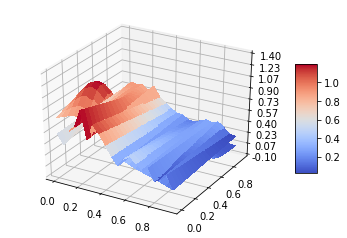

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
#from sklearn.pipeline import make_pipeline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)



def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


model = PolynomialRegression(1)


model.fit(x,z)

#X_test=np.linspace(0,1,100)[:, None]

z = FrankeFunction(x, y)


z_test = model.predict(y)


# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

bla = ax.plot_surface(x, y, z_test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Forsøker her å prediktere y med hensyn på  y og z

OLS R2-score:  -171.50203406265246
OLS Mean Square Error:  0.058056008389894075


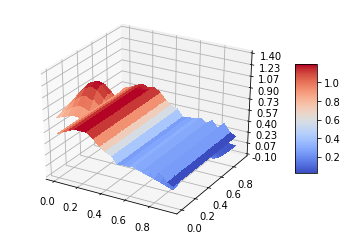

In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
#from sklearn.pipeline import make_pipeline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)



def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

z = FrankeFunction(x,y)

model = PolynomialRegression(1)


model.fit(y, z)

#X_test=np.linspace(0,1,100)[:, None]



z_test = model.predict(x)

r2 = r2_score(model.predict(x),z)
print ("OLS R2-score: ",r2 ) 
mse = mean_squared_error(model.predict(x), z)
print ("OLS Mean Square Error: ",mse)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

bla = ax.plot_surface(x, y, z_test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

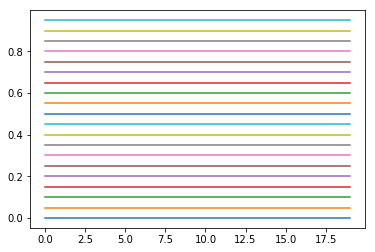

In [26]:
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
plt.plot(x)

In [2]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

FileNotFoundError: No such file: 'C:\Users\bsingstad\Documents\GitHub\FYS-STK4155-Project-1\SRTM_data_Norway_1.tif'

## Analysis/discussion

Analysis: of results and the effectiveness of their selection and presentation. Are the results well understood and discussed? Total number of possible points: 20

## Conclusions

Conclusions, discussions and critical comments: on what was learned about the method used and on the results obtained. Possible directions and future improvements? Total number of possible points: 10

## Clarity of figures and overall presentation

Clarity of figures and overall presentation. Too much or too little? Total number of possible points: 10*

## Referencing

Referencing: relevant works cited accurately? Total number of possible points 5*

[1] From the task https://compphysics.github.io/MachineLearning/doc/Projects/2018/Project1/html/Project1-bs.html

## Overall mark (%) and final possible final comments*